<a href="https://colab.research.google.com/github/tackulus/229352/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 03**

---

> **229352 Statistical Learning for Data Science 2**

> **Kasidis Torcharoen (610510531)**

In [1]:
%%capture
!wget -O heart_disease.csv \
    https://raw.githubusercontent.com/tackulus/229352/main/dataset/heart_disease.csv

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("heart_disease.csv", na_values='?')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  label     303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


**1. Use any method to deal with the missing data. Then split the data into a training set and a test set.**

In [5]:
data.dropna(inplace=True)

In [6]:
cols = ["cp", "restecg", "slope", "thal"]
data = pd.get_dummies(data, columns=cols)

In [7]:
from sklearn.model_selection import train_test_split

X = data.loc[ :, data.columns != "label" ]
y = data.label
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.20, random_state=0)

**2. Apply a grid search or a random search via cross-validation on the training set to find the best criterion
for node’s purity (gini index or entropy) and the optimal value of pruning hyperparameter α. You can
also include some other hyperparameters (tree’s depth, minimum number of samples in each leaf etc.)
if you want.**

**Note: Try small values of α—it should be somewhere between 0.0001 to 0.1 .**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
params = {
    "criterion": ["gini", "entropy"],
    "ccp_alpha": np.arange(0.0000, 0.1, 0.0001),
    "max_depth": range(2, 6)
}

clf = GridSearchCV(model, params, cv=10)
clf.fit(X_train,y_train)
clf.best_params_

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 3}

**3. Plot the tree model that you just obtained. Report all the features used in the classification. What is
the most important feature that indicates that a patient has a heart disease?**

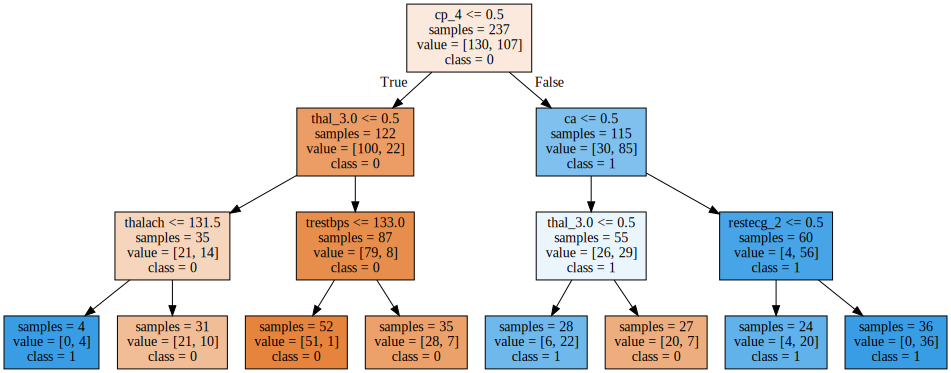

In [12]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf.best_estimator_, 
                           feature_names=X.columns,  
                           class_names= ['0', '1'], 
                           filled=True,
                           impurity=False)

graph = graphviz.Source(dot_data,format="png") 
graph

> The most important feature that indicates that a patient has a heart disease is **asymptomatic chest pain (cp=4)**.

**4. Report the accuracy (and possibly any other classification scores) of your predictions on the test set.**

In [10]:
from sklearn.metrics import classification_report as clf_report

print(clf_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        30
           1       0.86      0.63      0.73        30

    accuracy                           0.77        60
   macro avg       0.79      0.77      0.76        60
weighted avg       0.79      0.77      0.76        60



> Accuracy  = 77 % , Recall    = 86 % , Precision = 63 %